In [1]:
%matplotlib inline

from pycocotools.coco import COCO
import numpy as np
import os
import cv2
import matplotlib
import matplotlib.pyplot as plt
import sklearn

from tqdm import tqdm

In [2]:
img_path = "D:\\Datasets\\Segmentation\\COCO\\images\\val2017"
json_path = "D:\\Datasets\\Segmentation\\COCO\\annotations\\instances_val2017.json"

# img_path = "C:\\Users\\danie\\Downloads\\Bone_Mets_Manual_Segmentation\\images"
# json_path = "C:\\Users\\danie\\Downloads\\Bone_Mets_Manual_Segmentation\\annotations\\instances_default.json"

In [3]:
def BGR2RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
coco = COCO(json_path)

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


In [5]:
# Category IDs.
cat_ids = coco.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids, "\n")  # The IDs are not necessarily consecutive.

Number of Unique Categories: 80
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90] 



In [6]:
# All categories.
cats = coco.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names, "\n")

Categories Names:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'] 



In [7]:
# Category ID -> Category Name Example
query_id = cat_ids[1]
query_annotation = coco.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print("Category ID -> Category Name:")
print(
    f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}\n"
)

Category ID -> Category Name:
Category ID: 2, Category Name: bicycle, Supercategory: vehicle



In [8]:
# Category Name -> Category ID.
query_name = cat_names[1]
query_id = coco.getCatIds(catNms=[query_name])[0]
print("Category Name -> ID:")
print(f"Category Name: {query_name}, Category ID: {query_id}")

Category Name -> ID:
Category Name: bicycle, Category ID: 2


In [9]:
# Get the ID of all the images containing the object of the category.
img_ids = coco.getImgIds(catIds=[query_id])
print(f"Number of Images Containing {query_name}: {len(img_ids)}")

Number of Images Containing bicycle: 149


In [10]:
# Pick one image.
img_id = img_ids[0]
img_info = coco.loadImgs([img_id])[0]
img_file_name = img_info["file_name"]
img_url = img_info["coco_url"]
print(
    f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
)

Image ID: 184324, File Name: 000000184324.jpg, Image URL: http://images.cocodataset.org/val2017/000000184324.jpg


In [11]:
# Get all the annotations for the specified image.
ann_ids = coco.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = coco.loadAnns(ann_ids)
print(f"Annotations for Image ID {img_id}:")
print(anns)

Annotations for Image ID 184324:
[{'segmentation': [[520.97, 393.92, 545.65, 391.18, 548.39, 370.16, 547.47, 358.28, 541.08, 352.8, 528.28, 352.8, 515.48, 367.42, 516.4, 383.87], [466.13, 371.99, 460.65, 349.14, 473.44, 338.17, 485.32, 340.0, 486.24, 359.19, 481.67, 371.99, 471.61, 373.82]], 'area': 1818.0639000000006, 'iscrowd': 0, 'image_id': 184324, 'bbox': [460.65, 338.17, 87.74, 55.75], 'category_id': 2, 'id': 126207}, {'segmentation': [[483.4, 340.23, 474.06, 338.01, 465.17, 344.45, 462.95, 345.79, 455.17, 338.9, 458.06, 329.12, 462.06, 324.23, 465.62, 321.78, 472.29, 319.78, 478.73, 320.67, 481.18, 320.23, 484.06, 317.56, 487.62, 312.89, 481.18, 307.78, 482.29, 305.56, 486.51, 303.56, 486.51, 308.0, 493.62, 312.45, 498.73, 308.0, 486.95, 345.79, 485.62, 345.79], [521.62, 322.23, 530.74, 322.01, 533.18, 329.56, 531.4, 343.56, 530.74, 348.45, 522.96, 358.45, 514.73, 358.9, 514.73, 352.45, 518.29, 337.12, 517.85, 329.34]], 'area': 1322.7372999999993, 'iscrowd': 0, 'image_id': 18432

D:\Datasets\Segmentation\COCO\images\val2017
(425, 640, 3)


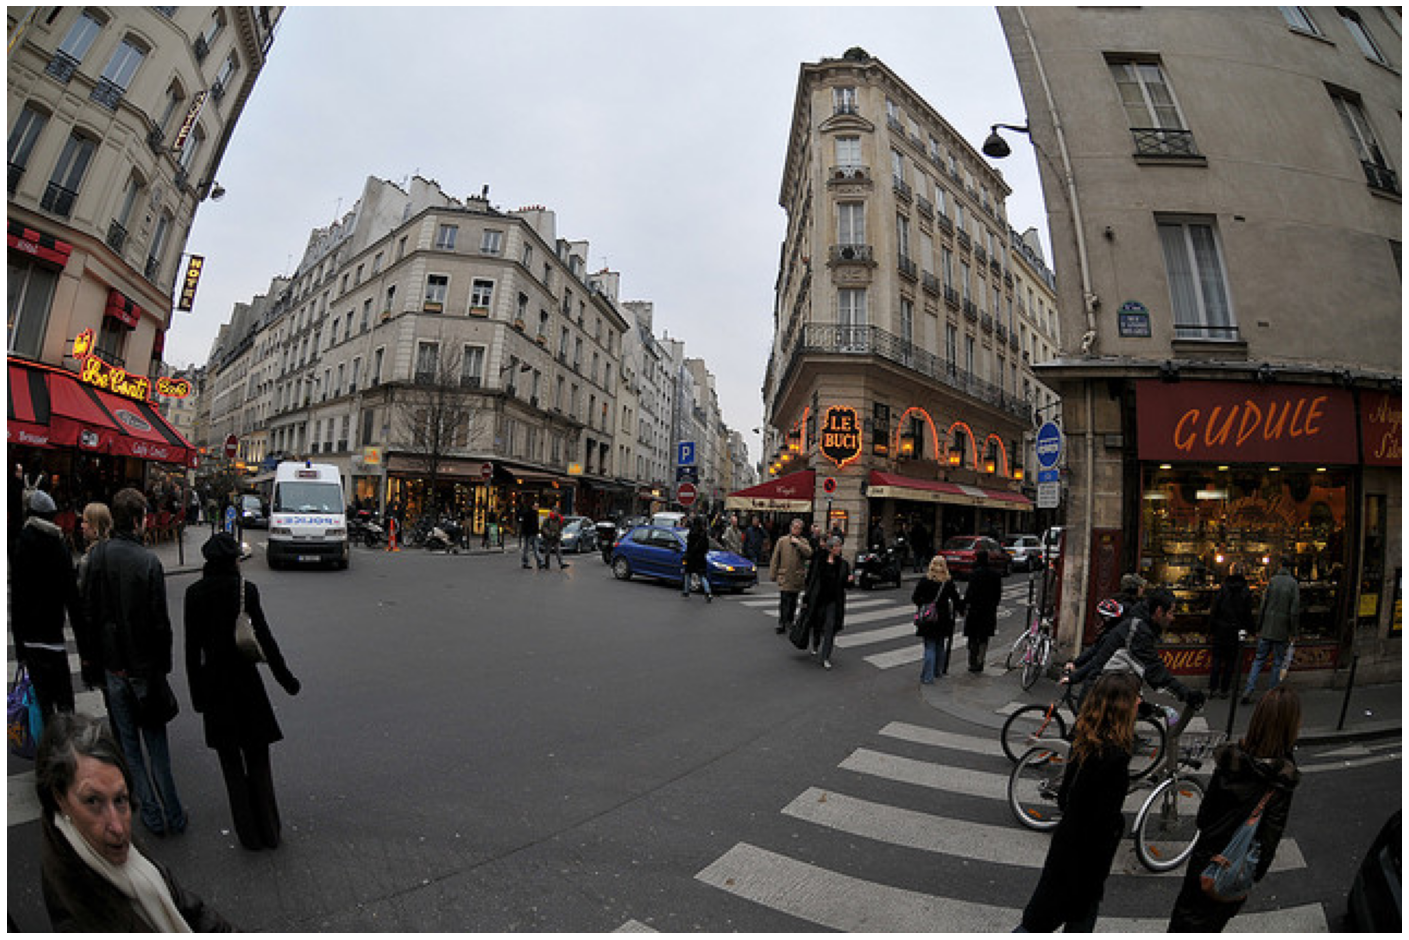

In [12]:
# Use URL to load image.
import cv2
import requests
im = cv2.imread(os.path.join(img_path, img_file_name))

print(img_path)
print(im.shape)

plt.figure(figsize=(25,25))
plt.axis("off")
plt.imshow(BGR2RGB(im))

# coco.showAnns(anns)

In [13]:
im.shape

(425, 640, 3)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 786.78it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float64
float64 0.0 31.0
float32 0.0 31.0


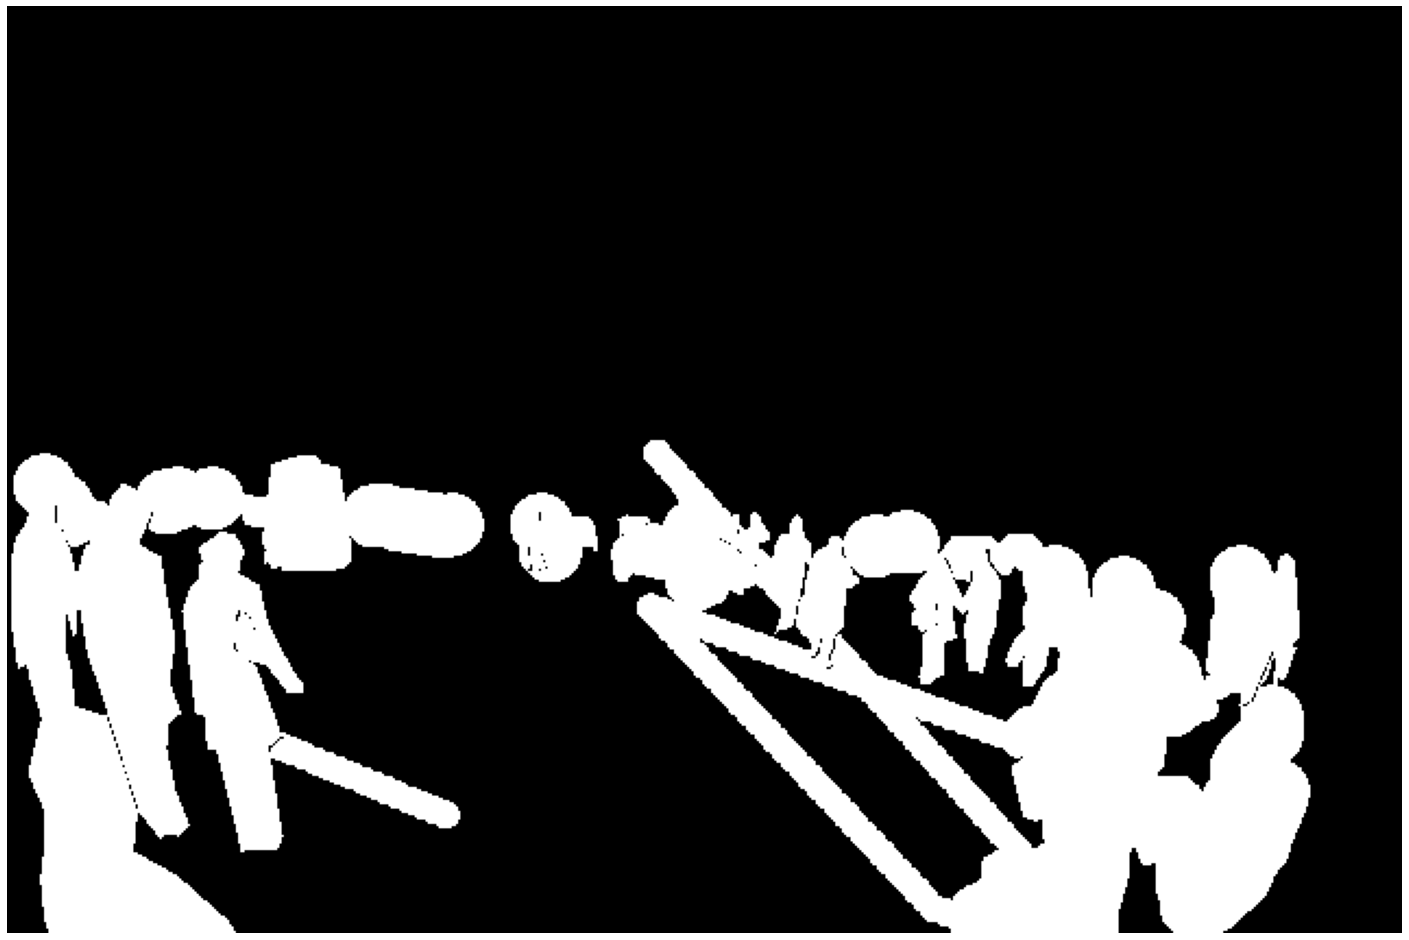

In [14]:
height = im.shape[0]
width = im.shape[1]

mask = np.zeros((height, width))

for ann in tqdm(anns):
    mask = np.maximum(mask, coco.annToMask(ann)*ann["category_id"])
    
plt.figure(figsize=(25,25))
plt.axis("off")
print(mask.dtype)
plt.imshow(BGR2RGB(np.float32(mask)))

print(mask.dtype, np.min(mask), np.max(mask))
print(np.float32(mask).dtype, np.min(np.float32(mask)), np.max(np.float32(mask)))

In [15]:
set(mask.flatten().tolist())

{0.0, 1.0, 2.0, 3.0, 6.0, 8.0, 13.0, 27.0, 28.0, 31.0}

In [16]:
n = "/home/dkermany/data/COCO/masks/000000397133.png"
m = "/home/dkermany/data/COCO/val2017/000000397133.jpg"
img = cv2.imread(n)
mimg = cv2.imread(m)

plt.figure(figsize=(25,25))
plt.imshow(BGR2RGB(mimg))

plt.figure(figsize=(25,25))
# plt.imshow(BGR2RGB(img))
plt.imshow(BGR2RGB(img*25))

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


<Figure size 1800x1800 with 0 Axes>

In [ ]:
set(img.flatten().tolist())